<a href="https://colab.research.google.com/github/YoshifumiMiyagi/Coronary-artery-brightness/blob/main/IP_CAbrightness_1220_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# prompt: PCAでクラスタリング dotにサンプリング番号を図示

import numpy as np
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 42
!pip install openpyxl

raw1 = pd.read_excel("/content/drive/MyDrive/R6_12_19_miyagi_consult.xlsx")
print(raw1.columns)
raw1
raw1.columns
df  = raw1
#df  = raw1.drop(columns=['ID'])
#
df.isnull().sum()

# Instead of dropping all rows with NaNs, consider filling them with a suitable value,
# such as the mean or median of the column.
#Df = df.dropna()
df_cleaned = df[['CA_max','CA_median','CA_mean']].fillna(df[['CA_max','CA_median','CA_mean']].mean())
print(df_cleaned.isnull().sum())
df_cleaned

Index(['ID', 'CA_min', 'CA_max', 'CA_median', 'CA_IQR', 'CA_mean', 'CA_stdDV',
       'CA_95%CL_low', 'CA_95%Ci_upper', 'prePCT (ng/mL)',
       ...
       'meanAll_RCA', 'stdAll_RCA', 'min_RCA', 'max_RCA', 'median_RCA',
       'IQR_RCA', 'mean_RCA', 'stdDV_RCA', '95%low_RCA', '95%upper_RCA'],
      dtype='object', length=119)
CA_max       0
CA_median    0
CA_mean      0
dtype: int64


,CA_max,CA_median,CA_mean
0,3.723047,1.436763,0.954026
1,1.699470,0.690264,0.452529
2,1.407696,0.710623,0.427973
3,4.303942,1.163185,0.929084
4,1.928908,0.893702,0.513680
...,...,...,...
96,6.550733,3.294340,1.613422
97,4.711157,1.695794,1.264901
98,10.036574,4.656723,2.733258
99,7.809507,3.411422,2.024582


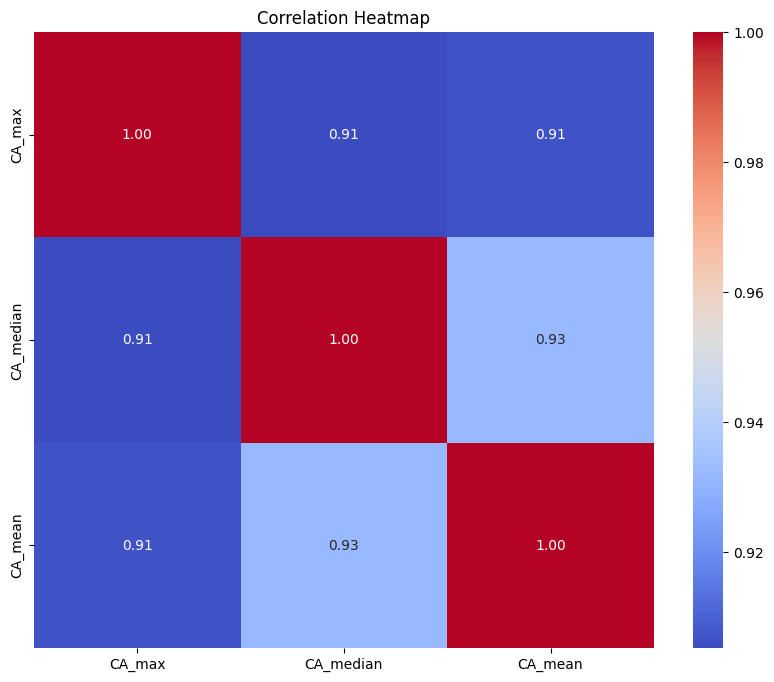

In [18]:
corr = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

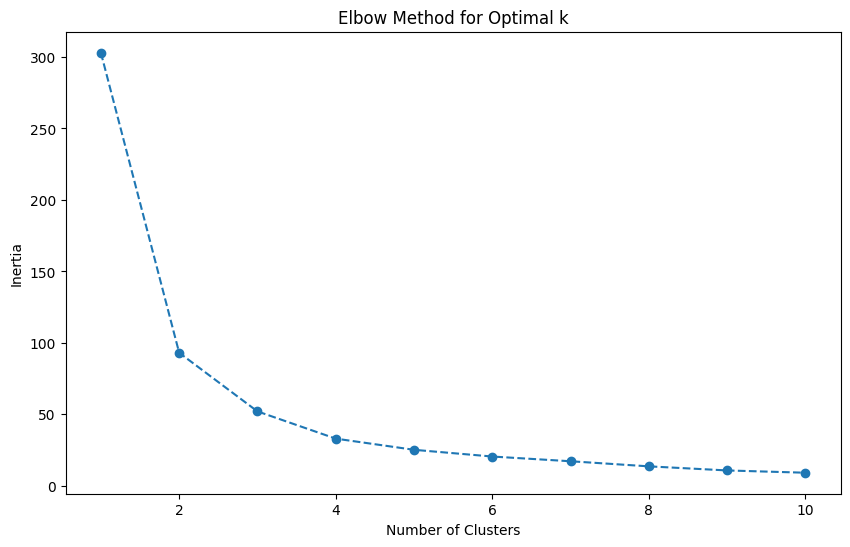

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=SEED)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Clusterを２つに設定するとき

In [72]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=SEED)
kmeans_labels = kmeans.fit_predict(scaled_features)
pd.Series(kmeans_labels).value_counts()

,count
0,81
1,20


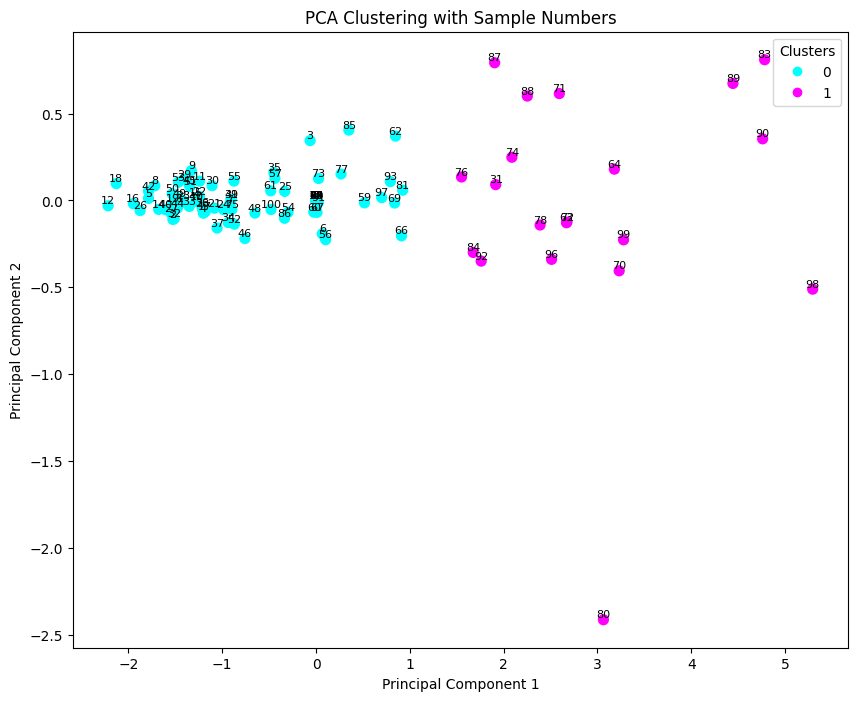

In [73]:
# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a scatter plot of the PCA results, color-coded by cluster, and annotated with the original index
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='cool', s=50)
plt.title('PCA Clustering with Sample Numbers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')

# Annotate each point with its original index
for i, (x, y) in enumerate(pca_features):
  plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')
plt.show()

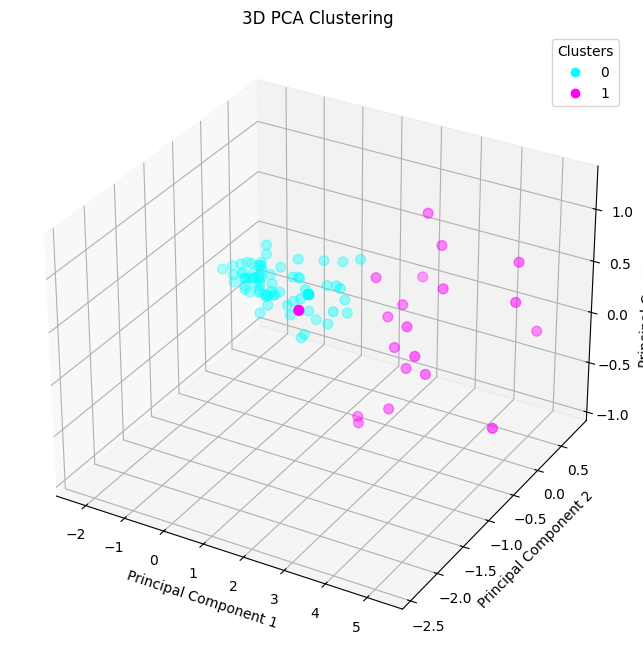

In [74]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for dimensionality reduction to 3 components
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(scaled_features)

# Create a 3D scatter plot of the PCA results, color-coded by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_features_3d[:, 0], pca_features_3d[:, 1], pca_features_3d[:, 2], c=kmeans_labels, cmap='cool', s=50)
plt.title('3D PCA Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

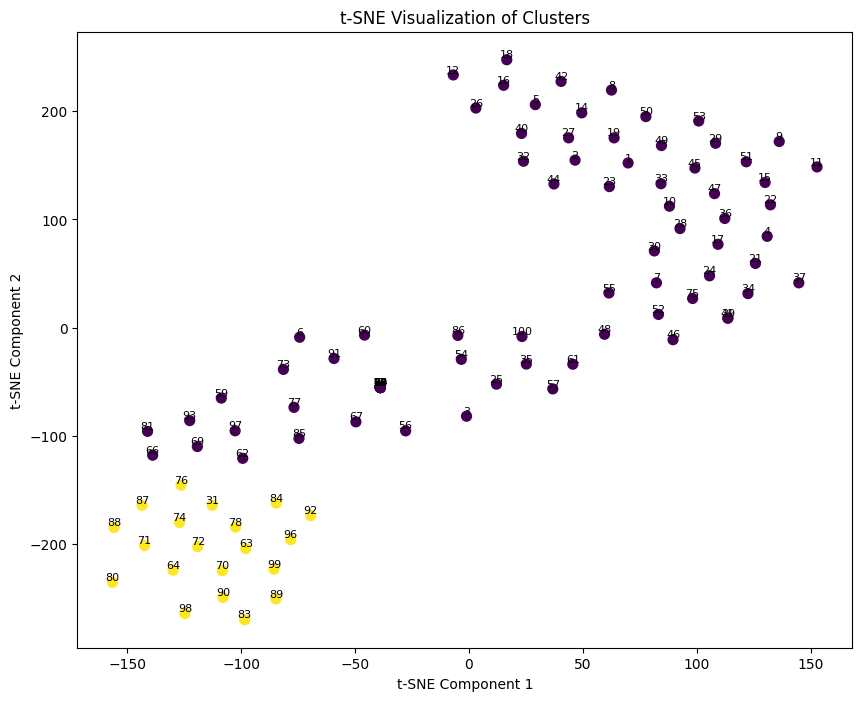

In [75]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=25, random_state=SEED)
tsne_results = tsne.fit_transform(scaled_features)


# Create a scatter plot of the t-SNE results, color-coded by cluster
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Annotate each point with its original index
for i, (x, y) in enumerate(tsne_results):
    plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')

plt.show()

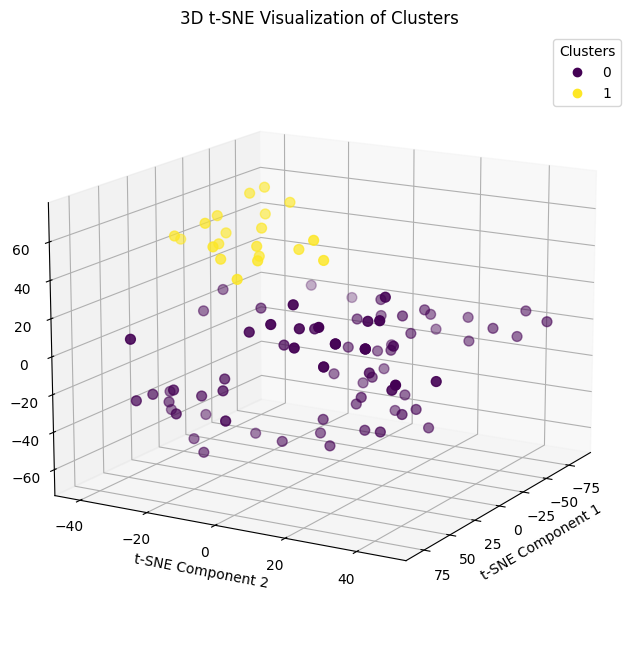

In [91]:
# prompt: t-SNE 3D

# Apply t-SNE for dimensionality reduction to 3 components
tsne_3d = TSNE(n_components=3, perplexity=10, random_state=SEED)
tsne_results_3d = tsne_3d.fit_transform(scaled_features)

# Create a 3D scatter plot of the t-SNE results, color-coded by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(15, 30)

scatter = ax.scatter(tsne_results_3d[:, 0], tsne_results_3d[:, 1], tsne_results_3d[:, 2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('3D t-SNE Visualization of Clusters')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [ ]:
# prompt: kmeans++でクラスタリング。そのあとにUMAPでdotにサンプリング番号を図示

!pip install umap-learn

import umap

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


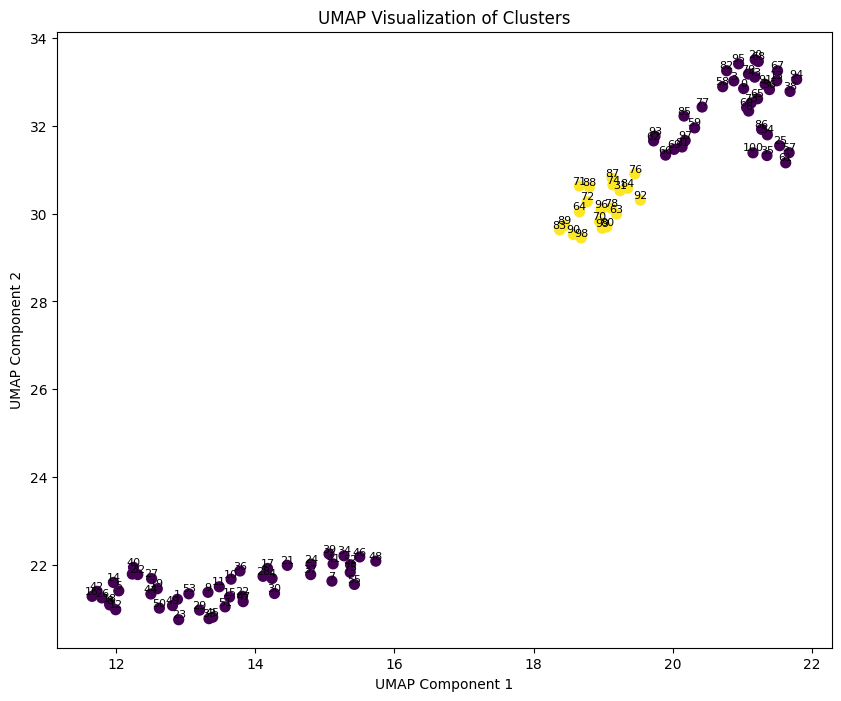

In [78]:
# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, n_neighbors=100,random_state=SEED)
embedding = reducer.fit_transform(scaled_features)

# Create a scatter plot of the UMAP results, color-coded by cluster
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate each point with its original index
for i, (x, y) in enumerate(embedding):
    plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


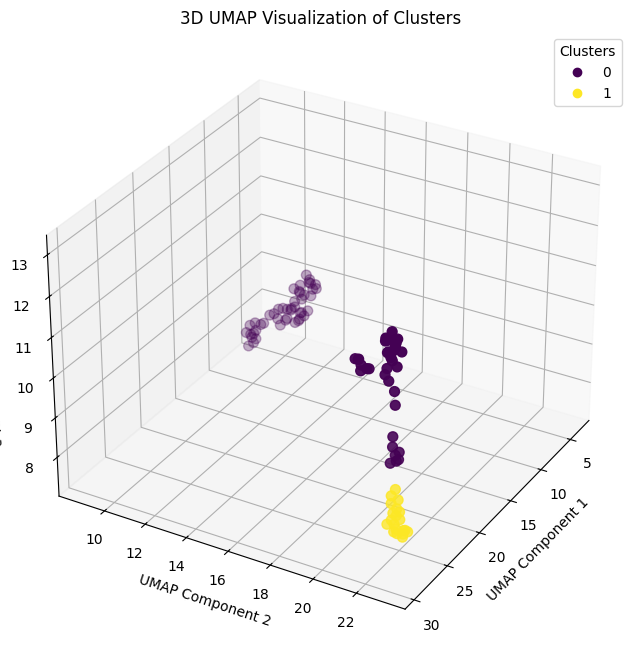

In [89]:
# prompt: n_components = 3のUMAPの結果を３Dで

# Apply UMAP for dimensionality reduction to 3 components
reducer_3d = umap.UMAP(n_components=3, n_neighbors=35, random_state=SEED)
embedding_3d = reducer_3d.fit_transform(scaled_features)

# Create a 3D scatter plot of the UMAP results, color-coded by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(30, 30)  # Adjust viewing angle if needed

scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('3D UMAP Visualization of Clusters')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [10]:
raw1.shape

(101, 119)

In [15]:
raw2 = raw1.copy()
raw2['cluster'] = kmeans_labels
raw2

,ID,CA_min,CA_max,CA_median,CA_IQR,CA_mean,CA_stdDV,CA_95%CL_low,CA_95%Ci_upper,prePCT (ng/mL),...,stdAll_RCA,min_RCA,max_RCA,median_RCA,IQR_RCA,mean_RCA,stdDV_RCA,95%low_RCA,95%upper_RCA,cluster
0,13315009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,12881896,0.020616,1.699470,0.690264,0.676750,0.452529,0.781262,0.660324,0.754292,0.42,...,22.177286,0.020616,1.147895,0.523814,0.471527,0.306736,0.450912,0.506091,0.541538,0
2,12478917,0.009929,1.407696,0.710623,0.708812,0.427973,0.776537,0.675690,0.745556,7.38,...,40.828303,0.020528,0.142992,0.066452,0.057267,0.047991,0.085725,0.026330,0.106574,0
3,13018471,0.014201,4.303942,1.163185,1.007103,0.929084,1.350977,1.118565,1.207804,1.45,...,19.985532,0.014201,2.766192,0.946970,0.664672,0.776345,1.350977,0.916535,0.977405,0
4,12813741,0.011888,1.928908,0.893702,0.882534,0.513680,0.767341,0.841958,0.945447,2.67,...,14.335209,0.045434,1.928908,0.893702,0.882534,0.513680,0.767341,0.841958,0.945447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,12966630,0.006689,6.550733,3.294340,3.595088,1.613422,2.309098,3.214060,3.374621,NaN,...,13.561239,0.015736,5.767423,2.759489,2.817840,1.442213,2.212187,2.709657,2.809322,1
97,12948108,0.031036,4.711157,1.695794,1.456346,1.264901,2.069588,1.643396,1.748192,NaN,...,22.226648,0.032089,4.711157,1.695794,1.426811,1.264901,2.069588,1.643396,1.748192,0
98,12798884,0.009431,10.036574,4.656723,4.605205,2.733258,4.386875,4.522526,4.790919,NaN,...,22.542101,0.038661,2.966516,1.399288,1.280782,0.776802,1.286482,1.348999,1.449577,1
99,13373331,0.027703,7.809507,3.411422,3.659280,2.024582,3.126145,3.377024,3.445820,17.60,...,28.529261,0.027703,1.394720,0.714375,0.693686,0.406930,0.736086,0.683644,0.745105,1


In [ ]:
#raw2.to_excel("/content/drive/MyDrive/R6_12_19_miyagi_consult_cluster.xlsx")

# Statictics

In [16]:
raw2.columns
raw2.cluster.value_counts()

,count
cluster,
0,81
1,20


In [8]:
# prompt: raw2のcolunnsでcluster 0と1で有意差あるもの

import scipy.stats as stats

# Assuming 'raw2' DataFrame is already created and contains the 'cluster' column.

# Perform t-tests for each column between cluster 0 and cluster 1.
alpha = 0.05  # Significance level
results = {}

for col in raw2.columns:
    if col != 'cluster' and pd.api.types.is_numeric_dtype(raw2[col]):
        group0 = raw2[raw2['cluster'] == 0][col]
        group1 = raw2[raw2['cluster'] == 1][col]

        # Handle cases where one or both groups have no data or NaN values
        if len(group0) > 0 and len(group1) > 0 and not (group0.isnull().all() or group1.isnull().all()):
            t_stat, p_value = stats.ttest_ind(group0.dropna(), group1.dropna())
            results[col] = {'t-statistic': t_stat, 'p-value': p_value}
        else:
            results[col] = {'t-statistic': np.nan, 'p-value': np.nan} # Indicate that the test could not be conducted

# Print the results
for col, stats in results.items():
  print(f"Column: {col}")
  print(f"  t-statistic: {stats['t-statistic']:.3f}")
  print(f"  p-value: {stats['p-value']:.3f}")
  if stats['p-value'] < alpha :
    print(f"  Significant difference found at alpha={alpha}")
  else :
    print(f"  No significant difference found at alpha={alpha}")
  print("-" * 20)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Column: ID
  t-statistic: 0.527
  p-value: 0.599
  No significant difference found at alpha=0.05
--------------------
Column: CA_min
  t-statistic: -0.833
  p-value: 0.407
  No significant difference found at alpha=0.05
--------------------
Column: CA_max
  t-statistic: -13.995
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_median
  t-statistic: -15.575
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_IQR
  t-statistic: -12.852
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_mean
  t-statistic: -15.004
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_stdDV
  t-statistic: -12.445
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_95%CL_low
  t-statistic: -15.633
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_95%Ci_uppe

# Clusterを３つに設定するとき

In [92]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=SEED)
kmeans_labels = kmeans.fit_predict(scaled_features)
pd.Series(kmeans_labels).value_counts()

,count
2,46
0,35
1,20


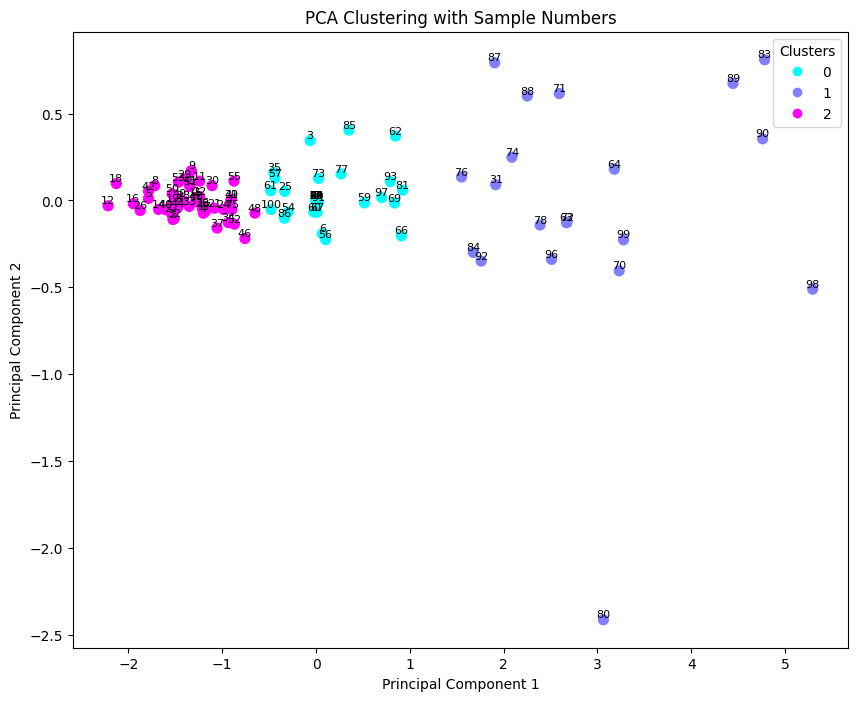

In [93]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a scatter plot of the PCA results, color-coded by cluster, and annotated with the original index
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='cool', s=50)
plt.title('PCA Clustering with Sample Numbers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')

# Annotate each point with its original index
for i, (x, y) in enumerate(pca_features):
  plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')
plt.show()

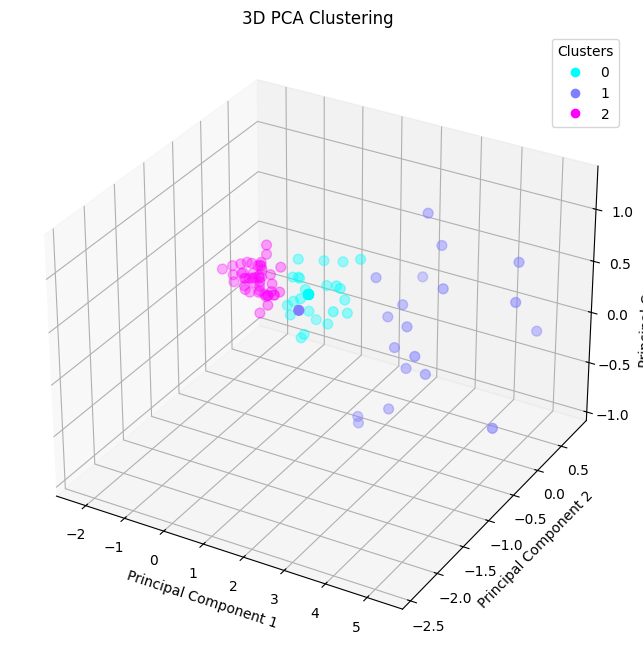

In [94]:
# prompt: 3DPCA

# Apply PCA for dimensionality reduction to 3 components
pca_3d = PCA(n_components=3)
pca_features_3d = pca_3d.fit_transform(scaled_features)

# Create a 3D scatter plot of the PCA results, color-coded by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_features_3d[:, 0], pca_features_3d[:, 1], pca_features_3d[:, 2], c=kmeans_labels, cmap='cool', s=50)
plt.title('3D PCA Clustering')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

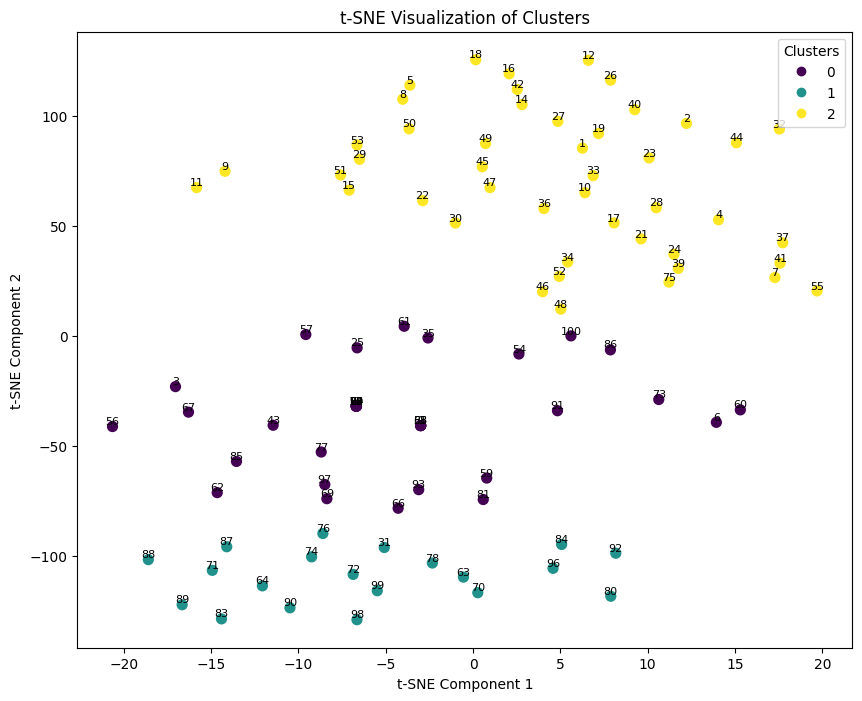

In [67]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=15, random_state=SEED)
tsne_results = tsne.fit_transform(scaled_features)


# Create a scatter plot of the t-SNE results, color-coded by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Annotate each point with its original index
for i, (x, y) in enumerate(tsne_results):
    plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')

plt.show()

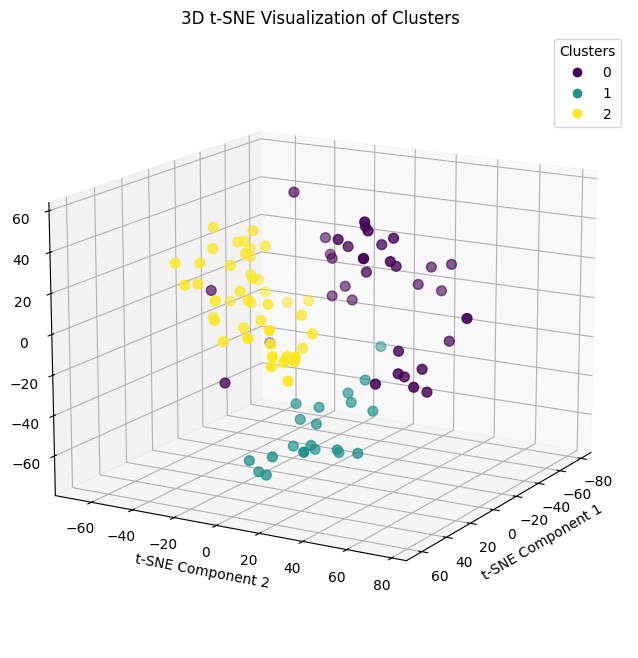

In [97]:
# prompt: t-SNE 3D

# Apply t-SNE for dimensionality reduction to 3 components
tsne_3d = TSNE(n_components=3, perplexity=5, random_state=SEED)
tsne_results_3d = tsne_3d.fit_transform(scaled_features)

# Create a 3D scatter plot of the t-SNE results, color-coded by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(15, 30)

scatter = ax.scatter(tsne_results_3d[:, 0], tsne_results_3d[:, 1], tsne_results_3d[:, 2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('3D t-SNE Visualization of Clusters')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


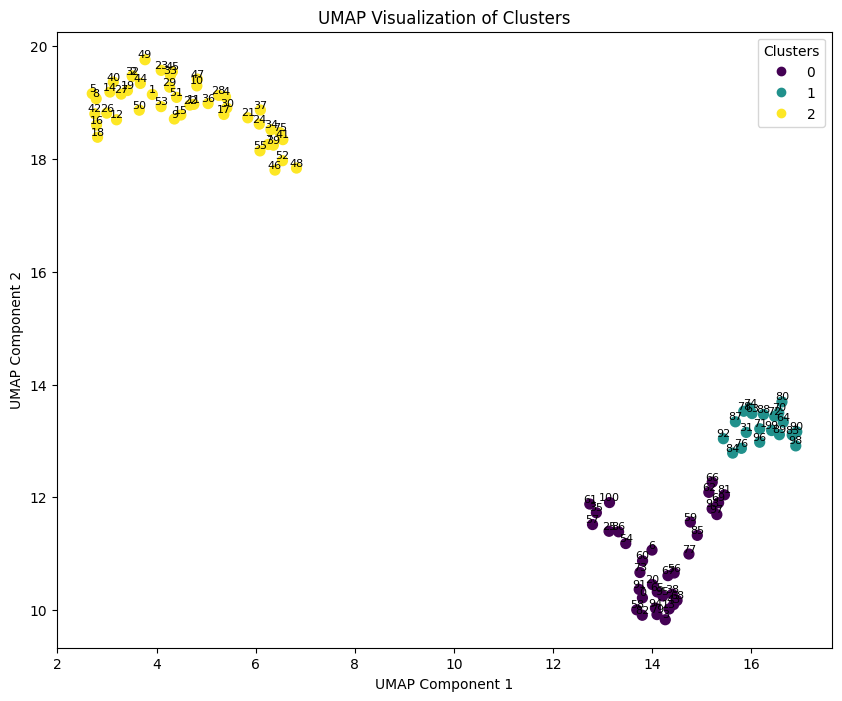

In [68]:
# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=80,random_state=SEED)
embedding = reducer.fit_transform(scaled_features)

# Create a scatter plot of the UMAP results, color-coded by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Annotate each point with its original index
for i, (x, y) in enumerate(embedding):
    plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


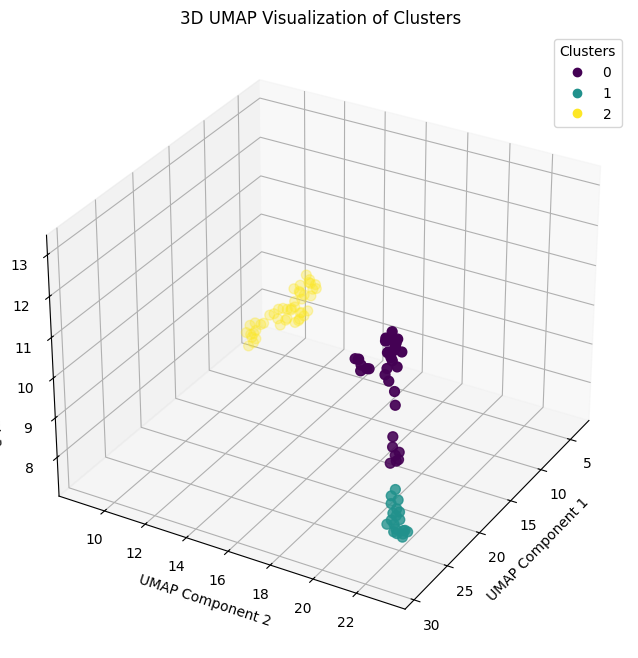

In [98]:
reducer_3d = umap.UMAP(n_components=3, n_neighbors=35, random_state=SEED)
embedding_3d = reducer_3d.fit_transform(scaled_features)

# Create a 3D scatter plot of the UMAP results, color-coded by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(30, 30)  # Adjust viewing angle if needed

scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('3D UMAP Visualization of Clusters')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [69]:
raw3 = raw1.copy()
raw3['cluster'] = kmeans_labels
raw3

,ID,CA_min,CA_max,CA_median,CA_IQR,CA_mean,CA_stdDV,CA_95%CL_low,CA_95%Ci_upper,prePCT (ng/mL),...,stdAll_RCA,min_RCA,max_RCA,median_RCA,IQR_RCA,mean_RCA,stdDV_RCA,95%low_RCA,95%upper_RCA,cluster
0,13315009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,12881896,0.020616,1.699470,0.690264,0.676750,0.452529,0.781262,0.660324,0.754292,0.42,...,22.177286,0.020616,1.147895,0.523814,0.471527,0.306736,0.450912,0.506091,0.541538,2
2,12478917,0.009929,1.407696,0.710623,0.708812,0.427973,0.776537,0.675690,0.745556,7.38,...,40.828303,0.020528,0.142992,0.066452,0.057267,0.047991,0.085725,0.026330,0.106574,2
3,13018471,0.014201,4.303942,1.163185,1.007103,0.929084,1.350977,1.118565,1.207804,1.45,...,19.985532,0.014201,2.766192,0.946970,0.664672,0.776345,1.350977,0.916535,0.977405,0
4,12813741,0.011888,1.928908,0.893702,0.882534,0.513680,0.767341,0.841958,0.945447,2.67,...,14.335209,0.045434,1.928908,0.893702,0.882534,0.513680,0.767341,0.841958,0.945447,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,12966630,0.006689,6.550733,3.294340,3.595088,1.613422,2.309098,3.214060,3.374621,NaN,...,13.561239,0.015736,5.767423,2.759489,2.817840,1.442213,2.212187,2.709657,2.809322,1
97,12948108,0.031036,4.711157,1.695794,1.456346,1.264901,2.069588,1.643396,1.748192,NaN,...,22.226648,0.032089,4.711157,1.695794,1.426811,1.264901,2.069588,1.643396,1.748192,0
98,12798884,0.009431,10.036574,4.656723,4.605205,2.733258,4.386875,4.522526,4.790919,NaN,...,22.542101,0.038661,2.966516,1.399288,1.280782,0.776802,1.286482,1.348999,1.449577,1
99,13373331,0.027703,7.809507,3.411422,3.659280,2.024582,3.126145,3.377024,3.445820,17.60,...,28.529261,0.027703,1.394720,0.714375,0.693686,0.406930,0.736086,0.683644,0.745105,1


In [71]:
# prompt: raw3のcolunnsでcluster 間でANOVA有意差あるもの

# Perform ANOVA tests for each column between clusters.
from scipy.stats import f_oneway

alpha = 0.05  # Significance level
anova_results = {}

for col in raw3.columns:
    if col != 'cluster' and pd.api.types.is_numeric_dtype(raw3[col]):
        groups = [raw3[raw3['cluster'] == i][col].dropna() for i in raw3['cluster'].unique()]
        # Check if all groups have at least one data point after removing NaN values
        if all(len(group) > 0 for group in groups):
          f_stat, p_value = f_oneway(*groups)
          anova_results[col] = {'f-statistic': f_stat, 'p-value': p_value}
        else:
          anova_results[col] = {'f-statistic': np.nan, 'p-value': np.nan}


# Print the ANOVA results
for col, stats in anova_results.items():
    print(f"Column: {col}")
    print(f"  F-statistic: {stats['f-statistic']:.3f}")
    print(f"  p-value: {stats['p-value']:.3f}")
    if stats['p-value'] < alpha:
        print(f"  Significant difference found at alpha={alpha}")
    else:
        print(f"  No significant difference found at alpha={alpha}")
    print("-" * 20)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Column: ID
  F-statistic: 0.463
  p-value: 0.631
  No significant difference found at alpha=0.05
--------------------
Column: CA_min
  F-statistic: 0.425
  p-value: 0.655
  No significant difference found at alpha=0.05
--------------------
Column: CA_max
  F-statistic: 188.975
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_median
  F-statistic: 237.988
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_IQR
  F-statistic: 130.713
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_mean
  F-statistic: 202.303
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_stdDV
  F-statistic: 141.965
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_95%CL_low
  F-statistic: 243.679
  p-value: 0.000
  Significant difference found at alpha=0.05
--------------------
Column: CA_95%Ci_upper

In [102]:
# prompt: raw3のpreTbil, preAST, preBNPをcluster 0と1, 1と２、２と０で比較

# Assuming 'raw3' DataFrame and the 'cluster' column are already defined.
import scipy.stats as stats
def compare_clusters(df, col1, col2, cluster1, cluster2):
    group1 = df[(df['cluster'] == cluster1)][col1]
    group2 = df[(df['cluster'] == cluster2)][col1]
    t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())
    print(f"Comparison of {col1} between Clusters {cluster1} and {cluster2}:")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  p-value: {p_value:.3f}")

    group1 = df[(df['cluster'] == cluster1)][col2]
    group2 = df[(df['cluster'] == cluster2)][col2]
    t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())
    print(f"Comparison of {col2} between Clusters {cluster1} and {cluster2}:")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  p-value: {p_value:.3f}")

# Example usage (replace 'preTbil', 'preAST', 'preBNP' with your actual column names)
# Comparing cluster 0 and 1
compare_clusters(raw3, 'preTbil', 'preAST', 0, 1)
compare_clusters(raw3, 'preAST', 'preBNP', 0,1)
compare_clusters(raw3, 'preBNP', 'preTbil',0,1)

# Comparing cluster 1 and 2
compare_clusters(raw3, 'preTbil', 'preAST', 1, 2)
compare_clusters(raw3, 'preAST', 'preBNP', 1,2)
compare_clusters(raw3, 'preBNP', 'preTbil',1,2)

# Comparing cluster 2 and 0
compare_clusters(raw3, 'preTbil', 'preAST', 2, 0)
compare_clusters(raw3, 'preAST', 'preBNP', 2,0)
compare_clusters(raw3, 'preBNP', 'preTbil',2,0)

Comparison of preTbil between Clusters 0 and 1:
  t-statistic: -2.877
  p-value: 0.006
Comparison of preAST between Clusters 0 and 1:
  t-statistic: -1.758
  p-value: 0.085
Comparison of preAST between Clusters 0 and 1:
  t-statistic: -1.758
  p-value: 0.085
Comparison of preBNP between Clusters 0 and 1:
  t-statistic: -2.134
  p-value: 0.038
Comparison of preBNP between Clusters 0 and 1:
  t-statistic: -2.134
  p-value: 0.038
Comparison of preTbil between Clusters 0 and 1:
  t-statistic: -2.877
  p-value: 0.006
Comparison of preTbil between Clusters 1 and 2:
  t-statistic: 2.957
  p-value: 0.004
Comparison of preAST between Clusters 1 and 2:
  t-statistic: 1.989
  p-value: 0.051
Comparison of preAST between Clusters 1 and 2:
  t-statistic: 1.989
  p-value: 0.051
Comparison of preBNP between Clusters 1 and 2:
  t-statistic: 1.516
  p-value: 0.136
Comparison of preBNP between Clusters 1 and 2:
  t-statistic: 1.516
  p-value: 0.136
Comparison of preTbil between Clusters 1 and 2:
  t-stat